In [5]:
from gensim.models import Word2Vec
# define training data
sentences = [['this','product','is', 'good', 'and', 'i','like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
# train model
model = Word2Vec(sentences, min_count=1,size=1)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model.wv['like'])


['this', 'product', 'is', 'good', 'and', 'i', 'like', 'very', 'much', 'nice', 'hate', 'the', 'phone', 'works', 'well', 'dislike']
[0.08369345]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


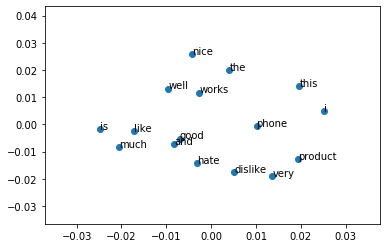

In [7]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'product', 'is', 'good', 'and', 'i', 'like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
# train model
model = Word2Vec(sentences, min_count=1,size=50)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [9]:
model.most_similar('phone')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('dislike', 0.3268710970878601),
 ('the', 0.2960941791534424),
 ('this', 0.17290271818637848),
 ('like', 0.10915470868349075),
 ('very', 0.10466693341732025),
 ('and', 0.10258114337921143),
 ('much', 0.08674754947423935),
 ('i', 0.07296200096607208),
 ('product', 0.06337942183017731),
 ('good', 0.02793877385556698)]

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']
------------------------------------------------
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar('king')
print(result)

In [11]:
import pandas as pd
from gensim.models import Word2Vec
import gensim
data=pd.read_csv('AmazonMobileDataCleanedFinal.csv')
sentence_list=[]
for sent in data['cleanedtext']:
    sentence_list.append(sent.split(' '))
w2v_model= gensim.models.Word2Vec(sentence_list,min_count=1,size=50)
print(w2v_model.wv.most_similar('great'))

[('fantastic', 0.8675758838653564), ('excellent', 0.8464673757553101), ('good', 0.8458603620529175), ('wonderful', 0.8291036486625671), ('awesome', 0.8187937140464783), ('perfect', 0.8185611963272095), ('amazing', 0.7980639338493347), ('nice', 0.7625538110733032), ('ok', 0.7418081760406494), ('decent', 0.7385033965110779)]


In [12]:
print(w2v_model.wv.most_similar('mobile'))

[('boost', 0.7485157251358032), ('tmo', 0.7386811971664429), ('virgin', 0.7386462688446045), ('cdma', 0.7221285104751587), ('prepaid', 0.7143771648406982), ('atts', 0.7142247557640076), ('solicitud', 0.7136120796203613), ('metropcs', 0.7122595310211182), ('tethering', 0.7121239900588989), ('verizons', 0.71153324842453)]


In [8]:
#https://medium.com/@ranasinghiitkgp/featurization-of-text-data-bow-tf-idf-avgw2v-tfidf-weighted-w2v-7a6c62e8b097
#average word to vec
import numpy as np
from gensim.models import Word2Vec
sentences = [['this','product','is', 'good', 'and', 'i','like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
model = Word2Vec(sentences, min_count=1,size=2)
sent_vectors = []; 
for sent in (sentences): 
    sent_vec = np.zeros(2) 
    cnt_words =0; 
    for word in sent: 
        if word in model:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(sent_vectors)


5
[array([0.10501145, 0.01816857]), array([0.03419459, 0.03670331]), array([0.06588365, 0.06204165]), array([0.07274395, 0.05187603]), array([ 0.03854867, -0.09391484])]


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]


In [10]:
#TFIDF word2vec
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

data=pd.read_csv('data.csv')
sentences=[]
for sent in data['test'].values:
    senten= ' '.join(e for e in sent.split())
    sentences.append(senten.lower().strip())

sentence_list=[]
for sent in sentences:
    sentence_list.append(sent.split(' '))

model = Word2Vec(sentence_list, min_count=1,size=2)
tfidf = TfidfVectorizer()
tfidf.fit(sentences)

dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))


tfidf_feat = tfidf.get_feature_names() 
w2v_feat=list(model.wv.vocab)
print(w2v_feat)
print(tfidf_feat)

row=0
tfidf_sent_vectors = []; 
for sent in (sentence_list): 
    sent_vec = np.zeros(2) 
    weight_sum =0; 
    for word in sent: 
        if word in model and word in tfidf_feat:
            vec = model.wv[word]
            print(vec)
            # tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
print(row)
print(tfidf_sent_vectors)

['this', 'mobile', 'is', 'good', 'not', 'works', 'fine', 'and', 'affordable', 'cheap', 'best']
['affordable', 'and', 'best', 'cheap', 'fine', 'good', 'is', 'mobile', 'not', 'this', 'works']
[0.03970935 0.24685258]
[-0.04944001  0.12793408]
[ 0.11852419 -0.05738637]
[ 0.05670625 -0.0547779 ]
[0.03970935 0.24685258]
[-0.04944001  0.12793408]
[ 0.11852419 -0.05738637]
[-0.07047149 -0.16921672]
[ 0.05670625 -0.0547779 ]
[0.03970935 0.24685258]
[-0.04944001  0.12793408]
[-0.01286825  0.14074828]
[-0.07021642  0.16287729]
[0.23019919 0.16249277]
[ 0.04143312 -0.1482211 ]
[-0.04944001  0.12793408]
[ 0.11852419 -0.05738637]
[0.01251456 0.24510306]
[0.23019919 0.16249277]
[-0.04944001  0.12793408]
[ 0.11852419 -0.05738637]
[ 0.24097511 -0.0738491 ]
4
[array([0.0463527 , 0.05586288]), array([ 0.01378236, -0.00688884]), array([0.02816714, 0.10262416]), array([0.08539482, 0.05652156])]


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
